# Training Deep Q-Learning Agent

In [1]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dqn import QAgent

In [2]:
# define environment
env = gym.make('LunarLander-v2')

# define parameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
episodes = 5
batch_size = 64

# define and train agent
agent = QAgent(env)
returns, steps = agent.training(env, batch_size, episodes)

env.close()

episode: 1/5, return: -220, epsilon: 0.91, steps: 111
episode: 2/5, return: -80, epsilon: 0.81, steps: 59
episode: 3/5, return: -155, epsilon: 0.66, steps: 105
episode: 4/5, return: -57, epsilon: 0.51, steps: 127
episode: 5/5, return: -175, epsilon: 0.43, steps: 92


In [5]:
print(f'Average return: {np.mean(returns)}')
print(f'Average return last 100 episodes: {np.mean(returns[-100:])}')

Average return: -137.25894753419038
Average return last 100 episodes: -137.25894753419038


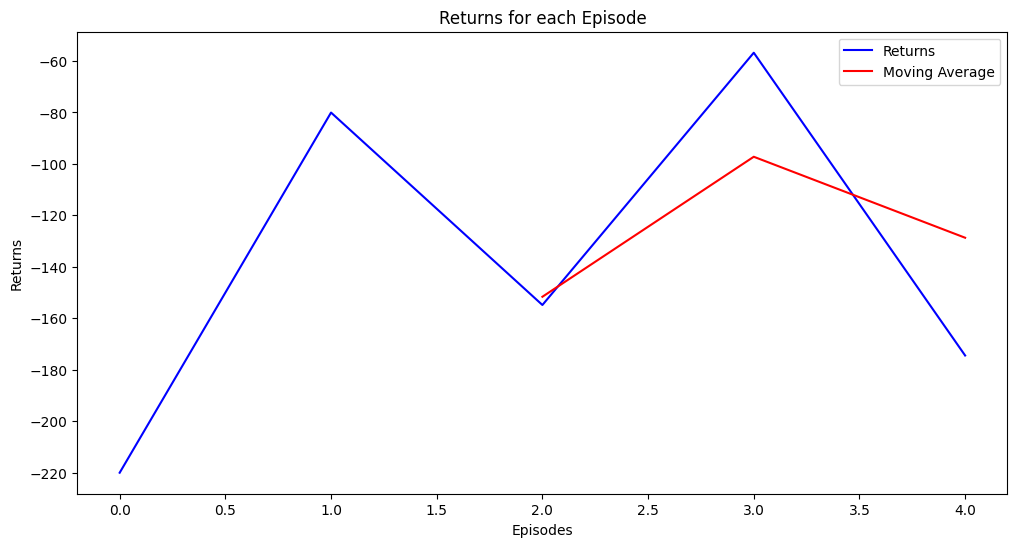

In [6]:
MA = pd.Series(returns).rolling(window=3).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=returns, label='Returns', color='blue')
sns.lineplot(data=MA, label='Moving Average', color='red')
plt.ylabel('Returns')
plt.xlabel('Episodes')
plt.title('Returns for each Episode')
plt.legend()
plt.show()

In [7]:
steps
# {episode: steps for that episode}

{1: 111, 2: 59, 3: 105, 4: 127, 5: 92}

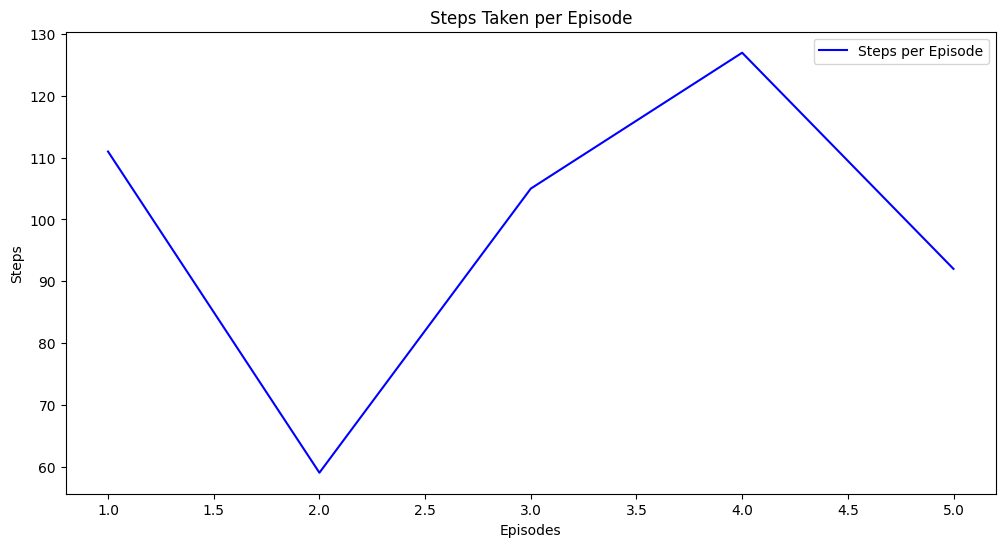

In [8]:
episodes = list(steps.keys())
steps_data = list(steps.values())

plt.figure(figsize=(12, 6))
sns.lineplot(x=episodes, y=steps_data, label='Steps per Episode', color='blue')
plt.ylabel('Steps')
plt.xlabel('Episodes')
plt.title('Steps Taken per Episode')
plt.show()